## Feature pre-procession and hyper-parameter tuning lab

In this lab we continue to use Ames housing dataset to practice the model optimization techniques.
There are 3 places need to be completed:
1. Scale features
2. Regularize features
3. Find the best hyper-parameter alpha

In [80]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

%matplotlib inline

## Load the data

We will use the Ames housing dataset from http://ww2.amstat.org/publications/jse/v19n3/decock.pdf.

In [81]:
data = pd.read_csv('AmesHousing.txt', delimiter='\t')
numeric_values = np.where(
    (data.dtypes == np.dtype('int64'))
    | (data.dtypes == np.dtype('float64'))
)[0]
X = data[numeric_values[2:-1]].values
y = data['SalePrice'].values
feature_names = data.columns[numeric_values[2:-1]]

In [82]:
numeric_values

array([ 0,  1,  2,  4,  5, 18, 19, 20, 21, 27, 35, 37, 38, 39, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 55, 57, 60, 62, 63, 67, 68, 69, 70, 71,
       72, 76, 77, 78, 81])

## Split the data into train / test

In [103]:
from sklearn.model_selection import train_test_split

X = np.nan_to_num(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Inspect the data

Let's take a quick look at the distribution of variables, looking for potential sources of outliers or features that may reduce the performance of our model.

We'll use whisker plots to visualize all of the features at once. The organge line is the median value, the edges of the box denote the 1st and 3rd quartile, the bars at the end denote the maxium and minimum values, and individual points within the top and bottom quartile.

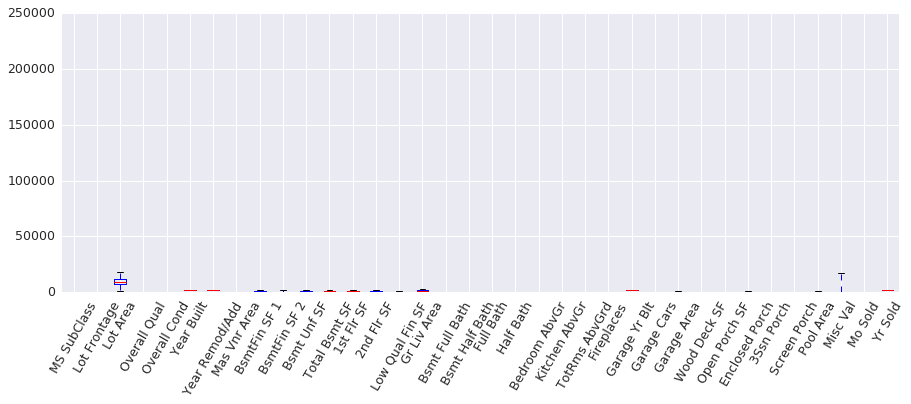

In [104]:
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(X_train)
ax.set_xticks(range(1, X_train.shape[1] + 1))
_ = ax.set_xticklabels(feature_names, rotation=60)

## Scale features
The scales of different features have a large variance. It could affect model performance. Rescale the range of each feature to [0, 1]. 

For each feature, use formula 
```
x_scaled = (x - min) / (max - min)
```
where min and max are the minimum and maximum values of the feature in the training set.

In [105]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

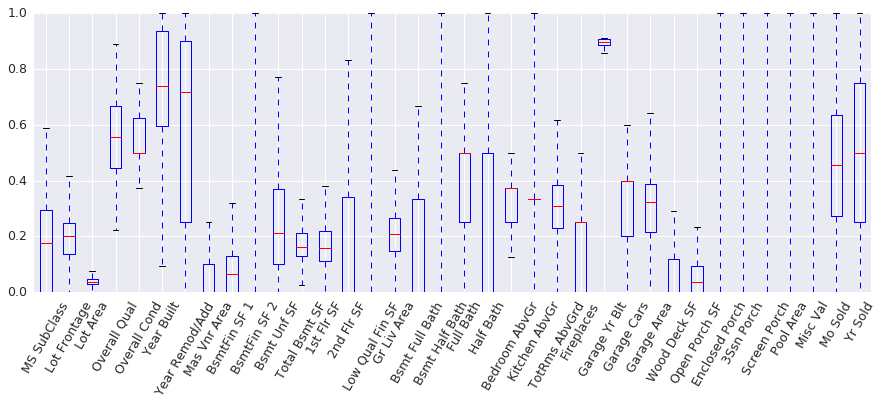

In [106]:
# Inspect the data after scaling
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(X_train_scaled)
ax.set_xticks(range(1, X_train_scaled.shape[1] + 1))
_ = ax.set_xticklabels(feature_names, rotation=60)

## Train a model



Model Coefficients
MS SubClass: -159.64
Lot Frontage: 64.35
  Lot Area: 0.46
Overall Qual: 17394.34
Overall Cond: 4581.53
Year Built: 361.06
Year Remod/Add: 158.13
Mas Vnr Area: 31.36
BsmtFin SF 1: 12.59
BsmtFin SF 2: -0.11
Bsmt Unf SF: -1.30
Total Bsmt SF: 11.18
1st Flr SF: 21.80
2nd Flr SF: 23.26
Low Qual Fin SF: -8.87
Gr Liv Area: 36.19
Bsmt Full Bath: 7010.57
Bsmt Half Bath: -894.05
 Full Bath: 2319.06
 Half Bath: -1722.53
Bedroom AbvGr: -8404.56
Kitchen AbvGr: -15358.96
TotRms AbvGrd: 1366.57
Fireplaces: 3294.95
Garage Yr Blt: -12.84
Garage Cars: 8910.33
Garage Area: 18.37
Wood Deck SF: 15.43
Open Porch SF: -8.15
Enclosed Porch: 17.76
3Ssn Porch: 5.51
Screen Porch: 50.38
 Pool Area: -91.91
  Misc Val: -9.80
   Mo Sold: 32.07
   Yr Sold: -1077.55

Fit R^2 = 0.84, prediction MSE = 1057328329.67011


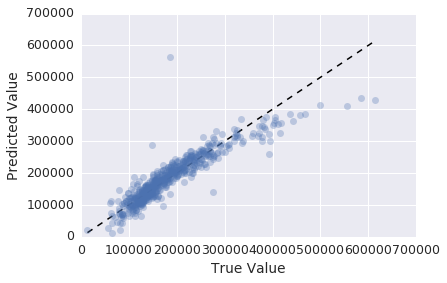

In [109]:
# Without scaling

clf = LinearRegression()
clf.fit(X_train, y_train)
fit_r2 = clf.score(X_train, y_train)
y_pred = clf.predict(X_test)
mse_pred = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots()
y_min = np.min(y_test)
y_max = np.max(y_test)
ax.plot([y_min, y_max], [y_min, y_max], 'k--')
ax.plot(y_test, y_pred, 'o', alpha=0.3)
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')

print('Model Coefficients')
for fn, coef in zip(feature_names, clf.coef_):
    print('%10s: %.2f' % (fn, coef))
print('\nFit R^2 = %.2f, prediction MSE = %.5f' % (fit_r2, mse_pred))

Model Coefficients
MS SubClass: -27141.85
Lot Frontage: 19915.21
  Lot Area: 99339.74
Overall Qual: 156399.04
Overall Cond: 36923.94
Year Built: 49667.28
Year Remod/Add: 9401.33
Mas Vnr Area: 50353.00
BsmtFin SF 1: -13055429455107666.00
BsmtFin SF 2: -3529869834975381.50
Bsmt Unf SF: -4980216090895745.00
Total Bsmt SF: 14133358251511172.00
1st Flr SF: -43598267056861912.00
2nd Flr SF: -18909981405672280.00
Low Qual Fin SF: -9743448046345592.00
Gr Liv Area: 48607351720076864.00
Bsmt Full Bath: 20928.00
Bsmt Half Bath: -2059.00
 Full Bath: 9930.00
 Half Bath: -3289.50
Bedroom AbvGr: -67314.50
Kitchen AbvGr: -46016.50
TotRms AbvGrd: 17547.50
Fireplaces: 13148.50
Garage Yr Blt: -28339.12
Garage Cars: 44713.38
Garage Area: 27173.38
Wood Deck SF: 22144.87
Open Porch SF: -5511.75
Enclosed Porch: 17120.50
3Ssn Porch: 2879.00
Screen Porch: 28683.56
 Pool Area: -73118.62
  Misc Val: -167118.73
   Mo Sold: 354.50
   Yr Sold: -4309.00

Fit R^2 = 0.84, prediction MSE = 1057275545.02083, prediction 

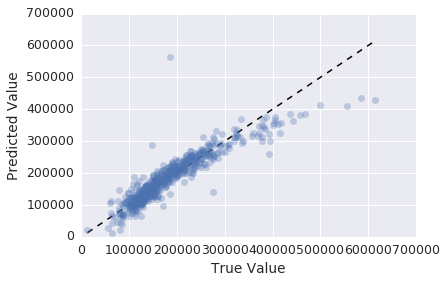

In [110]:
# With scaling

clf = LinearRegression()
clf.fit(X_train_scaled, y_train)
fit_r2 = clf.score(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
scaled_mse_pred = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots()
y_min = np.min(y_test)
y_max = np.max(y_test)
ax.plot([y_min, y_max], [y_min, y_max], 'k--')
ax.plot(y_test, y_pred, 'o', alpha=0.3)
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')

print('Model Coefficients')
for fn, coef in zip(feature_names, clf.coef_):
    print('%10s: %.2f' % (fn, coef))
print('\nFit R^2 = {0:.2f}, prediction MSE = {1:.5f}, prediction MSE reduction = {2:.5f}%'.format(
      fit_r2, scaled_mse_pred, (mse_pred - scaled_mse_pred) / mse_pred * 100))

## Regularize features

Use lasso with L1 norm to penalize non-zero coefficients. It can effectively reduce the number of variables on which the model is dependent.

Objective function of lasso:
```
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
```

Model Coefficients
MS SubClass: -29483.15
Lot Frontage: 11743.45
  Lot Area: 40753.26
Overall Qual: 169551.26
Overall Cond: 23550.42
Year Built: 40156.13
Year Remod/Add: 13842.02
Mas Vnr Area: 50941.78
BsmtFin SF 1: 67069.95
BsmtFin SF 2: 0.00
Bsmt Unf SF: 0.00
Total Bsmt SF: 42518.55
1st Flr SF: 3918.97
2nd Flr SF: 0.00
Low Qual Fin SF: -0.00
Gr Liv Area: 282073.88
Bsmt Full Bath: 26119.42
Bsmt Half Bath: -0.00
 Full Bath: 6091.55
 Half Bath: -0.00
Bedroom AbvGr: -33937.28
Kitchen AbvGr: -20398.26
TotRms AbvGrd: 0.00
Fireplaces: 19936.60
Garage Yr Blt: -21696.91
Garage Cars: 40189.75
Garage Area: 32305.19
Wood Deck SF: 12441.98
Open Porch SF: -0.00
Enclosed Porch: 0.00
3Ssn Porch: 0.00
Screen Porch: 20386.00
 Pool Area: -382.89
  Misc Val: -75863.05
   Mo Sold: 0.00
   Yr Sold: -3589.97

Fit R^2 = 0.83, prediction MSE = 1039897363.54819, prediction MSE reduction = 1.64859%


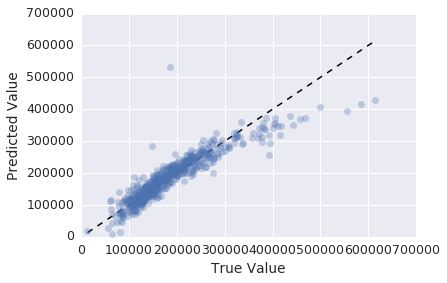

In [115]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=90)
lasso.fit(X_train_scaled, y_train)
lasso_fit_r2 = lasso.score(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
lasso_mse_pred = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots()
y_min = np.min(y_test)
y_max = np.max(y_test)
ax.plot([y_min, y_max], [y_min, y_max], 'k--')
ax.plot(y_test, y_pred, 'o', alpha=0.3)
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')

print('Model Coefficients')
for fn, coef in zip(feature_names, lasso.coef_):
    print('%10s: %.2f' % (fn, coef))
print('\nFit R^2 = {0:.2f}, prediction MSE = {1:.5f}, prediction MSE reduction = {2:.5f}%'.format(
      lasso_fit_r2, lasso_mse_pred, (mse_pred - lasso_mse_pred) / mse_pred * 100))

## Find the best alpha

Use grid search to find the best alpha in lasso that gives the minimum test error.


Best alpha = 90, best prediction MSE = 1039897363.54819, reduction = 1.6486%


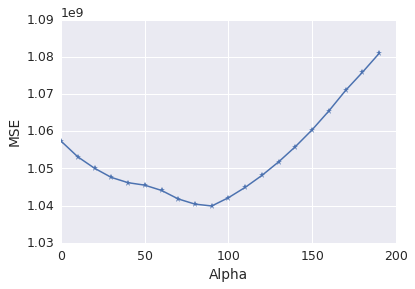

In [114]:
alphas = [i for i in range(0, 200, 10)]
mse_pred_array = []
best_mse = sys.maxint
best_alpha = 0
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_pred_array.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

fig, ax = plt.subplots()
y_min = np.min(mse_pred_array)
y_max = np.max(mse_pred_array)
ax.plot(alphas, mse_pred_array, '*-')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

print('\nBest alpha = {0}, best prediction MSE = {1:.5f}, reduction = {2:.4f}%'.format(
    best_alpha, best_mse, (mse_pred - best_mse) / mse_pred * 100))

## Bonus Point

* Try other normalization methods and compare the difference. 
* Convert the non-numeric features to binary features.